<a href="https://colab.research.google.com/github/UN-GCPDS/python-gcpds.EEG_Tensorflow_models/blob/main/Examples/BCI2a/shallowconvnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BCI2a

In [1]:
from EEG_Tensorflow_models.Utils.LoadData import load_dataset
from EEG_Tensorflow_models.Utils.Callbacks import get_callbacks
from EEG_Tensorflow_models.Utils.TrainingModels import get_loss,get_model,get_optimizer,train_model_cv
import tensorflow as tf

In [2]:
import numpy as np
import pickle
from scipy.signal import resample
import functools
import json

# Exp 1: Schirmeister 2017

In [65]:
with tf.device('/gpu:0'):
    opt_args = {'lr': 0.01,'beta_1': 0.9}
    optimizer = get_optimizer('Adam',opt_args)

    loss = get_loss('CategoricalCrossentropy')

    metrics = ['accuracy']

    callbacks_names = {'early_stopping_train':'early_stopping','checkpoint_train':'checkpoint',
                    'Threshold_valid':'Threshold','checkpoint_valid':'checkpoint',
                    'early_stopping_valid':'early_stopping'}


    Experiment = 'schirrmeister2017'
    model_name = 'ShallowConvNet'
    Version='2018'

    subjects = np.arange(1,10)
    Acc = []
    History = []
    Subject = []
    fs_new = 128
    for sbj in [4,5,6,7,9]:#subjects:
        print('Subject: {:d} of {:d}'.format(sbj,len(subjects)))

        X_train,y_train,X_valid,y_valid,fs,info = load_dataset(dataset_name="BNCI2014001", subject_id=sbj)
        
        X_train = resample(X_train,int((X_train.shape[-2]/fs)*fs_new),axis=-2)    
        X_valid = resample(X_valid,int((X_valid.shape[-2]/fs)*fs_new),axis=-2)     
        

        model_args = {'nb_classes':4,'Chans':X_train.shape[1],'Samples':X_train.shape[2],'dropoutRate':0.5,'version':Version}
        model = get_model(model_name,model_args)
        
    

        #model_args = {'nb_classes':4,'Chans':X_train.shape[1],'Samples':X_train.shape[2],'dropoutRate':0.5,'version':'2017'}
        #model = get_model(model_name,model_args)
        
        call_args = [{'monitor':'val_accuracy','patience':100,'min_delta':0.001,'mode':'max','verbose':1,'restore_best_weights':False},
                    {'filepath':'./tmp/checkpoint_sbj_'+str(sbj),'save_format':'tf','monitor':'val_accuracy','verbose':1,'save_weights_only':False,'save_best_only':True},
                    {'threshold':None},
                    {'filepath':'./tmp/checkpoint_2_sbj_'+str(sbj),'save_format':'tf','monitor':'val_accuracy','verbose':1,'save_weights_only':False,'save_best_only':True},
                    {'monitor':'val_accuracy','patience':None,'min_delta':0.001,'mode':'max','verbose':1,'restore_best_weights':True}]
                    
        callbacks = get_callbacks(callbacks_names,call_args)

        cv = train_model_cv(model,optimizer,loss,metrics,callbacks=callbacks)

        history = cv.fit_validation(X_train,y_train,X_val=X_valid,y_val=y_valid,batch_size=64,epochs=1000,verbose=0,val_mode=Experiment)
        acc = cv.get_accuracy()
        print('Subject accuracy: {:f}'.format(acc))
        Acc.append(acc)
        History.append(History)
        Subject.append(sbj)

        results = {}
        results['subject'] = Subject
        results['history'] = History
        results['accuracy'] = Acc

        with open('Results_BCI2a_'+Experiment+'_'+model_name+Version+'.p','wb') as handle:
            pickle.dump(results,handle)
        
        #del cv,callbacks,X_train,y_train,X_valid,y_valid,fs

Subject: 4 of 9
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413

/home/daniel/anaconda3/envs/gcpds/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function scale is deprecated; will be removed in 0.7.0. Use numpy.multiply instead.
  warnings.warn(msg, category=FutureWarning)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 

2022-03-07 22:48:24.925748: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at conv_grad_filter_ops.cc:989 : NOT_FOUND: No algorithm worked!  Error messages:
  Profiling failure on CUDNN engine 1: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in tensorflow/stream_executor/cuda/cuda_dnn.cc(4177): 'cudnnConvolutionBackwardFilter( cudnn.handle(), alpha, input_nd_.handle(), input_data.opaque(), output_nd_.handle(), output_data.opaque(), conv_.handle(), ToConvBackwardFilterAlgo(algo), scratch_memory.opaque(), scratch_memory.size(), beta, filter_.handle(), filter_data.opaque())'
  Profiling failure on CUDNN engine 0: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in tensorflow/stream_executor/cuda/cuda_dnn.cc(4177): 'cudnnConvolutionBackwardFilter( cudnn.handle(), alpha, input_nd_.handle(), input_data.opaque(), output_nd_.handle(), output_data.opaque(), conv_.handle(), ToConvBackwardFilterAlgo(algo), scratch_memory.opaque(), scratch_memory.size(), beta, filter_.handle(), filter_data.opaqu

NotFoundError: Graph execution error:

Detected at node 'gradient_tape/model_72/Conv2D_2/Conv2D/Conv2DBackpropFilter' defined at (most recent call last):
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 367, in dispatch_shell
      await result
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2854, in run_cell
      result = self._run_cell(
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2900, in _run_cell
      return runner(coro)
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3098, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3301, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3361, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_25117/1147148932.py", line 50, in <cell line: 1>
      history = cv.fit_validation(X_train,y_train,X_val=X_valid,y_val=y_valid,batch_size=64,epochs=1000,verbose=0,val_mode=Experiment)
    File "/home/daniel/src/eeg-tensorflow-models/EEG_Tensorflow_models/Utils/TrainingModels.py", line 101, in fit_validation
      history1 = self.fit_model(X_tr, y_tr,X_ts, y_ts,batch_size=batch_size,epochs=epochs,
    File "/home/daniel/src/eeg-tensorflow-models/EEG_Tensorflow_models/Utils/TrainingModels.py", line 79, in fit_model
      history= self.model.fit(X,y,validation_data=(X_val,y_val),batch_size=batch_size,epochs=epochs,verbose=verbose,callbacks=callbacks)
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/site-packages/keras/engine/training.py", line 863, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py", line 530, in minimize
      grads_and_vars = self._compute_gradients(
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py", line 583, in _compute_gradients
      grads_and_vars = self._get_gradients(tape, loss, var_list, grad_loss)
    File "/home/daniel/anaconda3/envs/gcpds/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py", line 464, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/model_72/Conv2D_2/Conv2D/Conv2DBackpropFilter'
No algorithm worked!  Error messages:
  Profiling failure on CUDNN engine 1: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in tensorflow/stream_executor/cuda/cuda_dnn.cc(4177): 'cudnnConvolutionBackwardFilter( cudnn.handle(), alpha, input_nd_.handle(), input_data.opaque(), output_nd_.handle(), output_data.opaque(), conv_.handle(), ToConvBackwardFilterAlgo(algo), scratch_memory.opaque(), scratch_memory.size(), beta, filter_.handle(), filter_data.opaque())'
  Profiling failure on CUDNN engine 0: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in tensorflow/stream_executor/cuda/cuda_dnn.cc(4177): 'cudnnConvolutionBackwardFilter( cudnn.handle(), alpha, input_nd_.handle(), input_data.opaque(), output_nd_.handle(), output_data.opaque(), conv_.handle(), ToConvBackwardFilterAlgo(algo), scratch_memory.opaque(), scratch_memory.size(), beta, filter_.handle(), filter_data.opaque())'
  Profiling failure on CUDNN engine 3: UNKNOWN: CUDNN_STATUS_EXECUTION_FAILED
in tensorflow/stream_executor/cuda/cuda_dnn.cc(4177): 'cudnnConvolutionBackwardFilter( cudnn.handle(), alpha, input_nd_.handle(), input_data.opaque(), output_nd_.handle(), output_data.opaque(), conv_.handle(), ToConvBackwardFilterAlgo(algo), scratch_memory.opaque(), scratch_memory.size(), beta, filter_.handle(), filter_data.opaque())'
	 [[{{node gradient_tape/model_72/Conv2D_2/Conv2D/Conv2DBackpropFilter}}]] [Op:__inference_train_function_73865]

Subject: 3 of 9
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
48 events found
Event IDs: [1 2 3 4]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413

/home/daniel/anaconda3/envs/gcpds/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function scale is deprecated; will be removed in 0.7.0. Use numpy.multiply instead.
  warnings.warn(msg, category=FutureWarning)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 

2022-03-12 09:22:23.307831: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-12 09:22:23.965409: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-12 09:22:23.966675: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-12 09:22:23.988915: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Gradcam++ class 0 layer Conv2D_1
Gradcam++ class 0 layer Conv2D_2
Gradcam++ class 1 layer Conv2D_1
Gradcam++ class 1 layer Conv2D_2
Gradcam++ class 2 layer Conv2D_1
Gradcam++ class 2 layer Conv2D_2
Gradcam++ class 3 layer Conv2D_1
Gradcam++ class 3 layer Conv2D_2


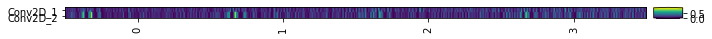

2022-03-12 09:22:46.882167: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8200


saved subjetc 3


In [3]:
from EEG_Tensorflow_models.Utils.Attention_maps import Attention_maps

# perform arctivation class over all subjects
def Confidence_index(model,x_train,y_train,tmpr):
    y_tilde=[]
    y=[]
    labels=[]
    for i in np.unique(y_train):
        idx = y_train==i
        labels.append(y_train[idx])
        x = x_train[idx]
        y_tilde.append(model(x*tmpr[0,i,:,:,np.newaxis]))
        y.append(model(x))
    y_all = functools.reduce(lambda x,y:np.concatenate([x,y],axis=0),y)
    labels_all = functools.reduce(lambda x,y:np.concatenate([x,y],axis=0),labels)
    y_tilde_all = functools.reduce(lambda x,y:np.concatenate([x,y],axis=0),y_tilde)
    result=[]
    for j in range(len(y_all)):
        if np.argmax(y_tilde_all[j])!=labels_all[j]:
            result.append(-1)
        elif y_tilde_all[j][labels_all[j]]>y_all[j][labels_all[j]]:
            result.append(1)
        else:
            result.append(0) 
    return result
subjects = np.arange(1,10)
fs_new = 128
for sbj in [3]:#subjects:
    print('Subject: {:d} of {:d}'.format(sbj,len(subjects)))

    X_train,y_train,X_valid,y_valid,fs,info = load_dataset(dataset_name="BNCI2014001", subject_id=sbj)
    
    X_train = resample(X_train,int((X_train.shape[-2]/fs)*fs_new),axis=-2)    
    #X_valid = resample(X_valid,int((X_valid.shape[-2]/fs)*fs_new),axis=-2)     
    
    model = tf.keras.models.load_model(f'/home/daniel/Documents/python-gcpds.EEG_Tensorflow_models/Examples/BCI2a/tmp/checkpoint_2_sbj_{sbj}')
    # using cpu if needed.
    with tf.device('/cpu:0'):
        rel_model_name = ['Gradcam++'] #Gradcam, Gradcam++, Saliency, Scorecam
        layer_name =  ['Conv2D_1','Conv2D_2'] #'conv\w*\s' ---errors, check...
        relM_,tmpr_ = Attention_maps(rel_model_name,layer_name,model,
                                            X_train,y_train,function_combination=np.prod,
                                            norm_c=False,norm_max_min=False,
                                            plot_int=False,transpose=False)
    new_model = tf.keras.Model(inputs=model.input,outputs=model.get_layer('output').output)
    tmpr_=tmpr_/(1e-8+tmpr_.max())
    result = Confidence_index(model,X_train,y_train,tmpr_)
    with open(f'/home/daniel/Documents/python-gcpds.EEG_Tensorflow_models/Examples/BCI2a/tmp/confidence{sbj}.json','w') as f:
        json.dump(result,f)
    print(f'saved subjetc {sbj}')

In [ ]:
model,X_train,y_train,tmpr_

In [12]:
tmpr_.shape

(1, 4, 22, 576)

In [13]:
indx_ord = np.argsort(y_train)
relM_ravel = relM_.reshape([1,288,22,576]).squeeze()
X_train_ord=X_train[indx_ord].squeeze()

In [14]:
relM_ravel.shape,X_train_ord.shape

((288, 22, 576), (288, 22, 576))

In [15]:
new_map = relM_ravel*X_train_ord

In [17]:
new_map.shape

(288, 22, 576)

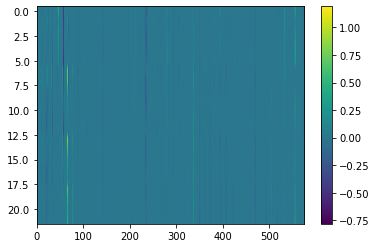

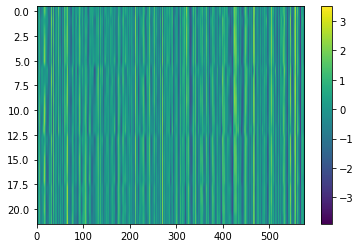

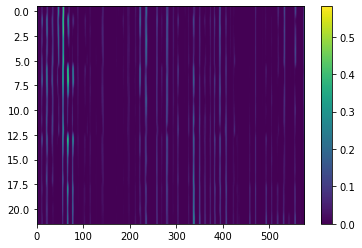

In [24]:
import matplotlib.pyplot as plt
tr=0
plt.figure()
plt.imshow(new_map[tr,:,:],aspect='auto')
plt.colorbar()
plt.figure()
plt.imshow(X_train_ord[tr,:,:],aspect='auto')
plt.colorbar()
plt.figure()
plt.imshow(relM_ravel[tr,:,:],aspect='auto')
plt.colorbar()

In [26]:
out_1=new_model.predict(X_train_ord[...,np.newaxis])
out_2=new_model.predict(new_map[...,np.newaxis])

In [44]:
out_1[0],out_2[0]

(array([ 3.7348657, -1.6506932, -1.5351267, -1.674215 ], dtype=float32),
 array([ -5.4884124,  22.801523 ,  23.269934 , -47.28788  ], dtype=float32))

<StemContainer object of 3 artists>

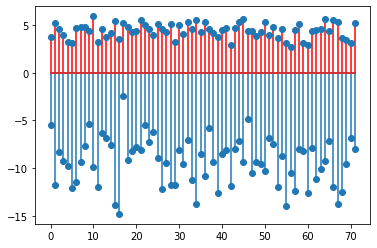

In [43]:
plt.stem(out_1[:72,0],linefmt='r')
plt.stem(out_2[:72,0])

In [69]:
subjects = np.arange(1,10)
for sbj in subjects:
    with open(f'/home/daniel/Documents/python-gcpds.EEG_Tensorflow_models/Examples/BCI2a/tmp/confidence{sbj}.json','r') as f:
        data=json.load(f)
    print(f'para sujeto {sbj} resulttados {np.unique(data,return_counts=True)}')

para sujeto 1 resulttados (array([-1,  1]), array([216,  72]))
para sujeto 2 resulttados (array([-1,  1]), array([216,  72]))
para sujeto 3 resulttados (array([-1,  1]), array([216,  72]))
para sujeto 4 resulttados (array([-1,  1]), array([216,  72]))
para sujeto 5 resulttados (array([-1,  1]), array([202,  86]))
para sujeto 6 resulttados (array([-1,  1]), array([216,  72]))
para sujeto 7 resulttados (array([-1,  1]), array([216,  72]))
para sujeto 8 resulttados (array([-1,  1]), array([216,  72]))
para sujeto 9 resulttados (array([-1,  1]), array([216,  72]))


In [45]:
with open('/home/daniel/Documents/python-gcpds.EEG_Tensorflow_models/Examples/BCI2a/Results_BCI2a_schirrmeister2017_ShallowConvNet2018.p','r') as handle:
            data=pickle.load(handle)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1]

In [44]:
y_all[0],y_tilde_all[0]

(array([ 3.6580381 , -1.112581  , -3.0839155 , -0.44693738], dtype=float32),
 array([  4.5897655,   7.1232233,  19.013948 , -27.87566  ], dtype=float32))

In [12]:
with tf.device('/cpu:0'):
    print(np.round(tf.nn.softmax([0.1,3,1,0.5])*100))
    print(np.round(tf.nn.softmax([1.0,23,21,5])*100))

[ 4. 79. 11.  6.]
[ 0. 88. 12.  0.]


In [ ]:
tf.nn.softmax([1,23,21,5])

In [ ]:
# get new model dropping last activation function, select input layer and output layers (
# all models are standarized to have output -2 layer and out_activation for the last layer (the activation one)
new_model = tf.keras.Model(inputs=model.input,outputs=model.get_layer('output').output)

In [ ]:
tmpr_.shape,relM_.shape

In [ ]:
cl=y_train[0]
new_model(X_train[:1]),y_train[:1],cl

In [ ]:
new_model(X_train[:1]*relM_[0,cl,0,:,:,np.newaxis])

In [ ]:
new_model(X_train[:1]*tmpr_[0,cl,:,:,np.newaxis])

In [ ]:
X_train.shape

# Exp 2: Schirmeister 2017_legal

In [ ]:
opt_args = {'lr': 0.01,'beta_1': 0.9}
optimizer = get_optimizer('Adam',opt_args)

loss = get_loss('CategoricalCrossentropy')

metrics = ['accuracy']

callbacks_names = {'early_stopping_train':'early_stopping','checkpoint_train':'checkpoint',
                'Threshold_valid':'Threshold','checkpoint_valid':'checkpoint',
                'early_stopping_valid':'early_stopping'}


Experiment = 'schirrmeister2017_legal'
model_name = 'ShallowConvNet'
Version='2018'

subjects = np.arange(1,10)
Acc = []
History = []
Subject = []
for sbj in subjects:
    print('Subject: {:d} of {:d}'.format(sbj,len(subjects)))

    X_train,y_train,X_valid,y_valid,fs = load_dataset(dataset_name="BNCI2014001", subject_id=sbj)
    fs_new = 128
    X_train = resample(X_train,int((X_train.shape[-2]/fs)*fs_new),axis=-2)    
    X_valid = resample(X_valid,int((X_valid.shape[-2]/fs)*fs_new),axis=-2)    
    model_args = {'nb_classes':4,'Chans':X_train.shape[1],'Samples':X_train.shape[2],'dropoutRate':0.5,'version':Version}
    model = get_model(model_name,model_args)


    call_args = [{'monitor':'val_accuracy','patience':100,'min_delta':0.001,'mode':'max','verbose':1,'restore_best_weights':False},
                {'filepath':'/kaggle/tmp/checkpoint_sbj_'+str(sbj),'save_format':'tf','monitor':'val_accuracy','verbose':1,'save_weights_only':True,'save_best_only':True},
                {'threshold':None},
                {'filepath':'/kaggle/tmp/checkpoint_2_sbj_'+str(sbj),'save_format':'tf','monitor':'val_accuracy','verbose':1,'save_weights_only':True,'save_best_only':True},
                {'monitor':'val_accuracy','patience':None,'min_delta':0.001,'mode':'max','verbose':1,'restore_best_weights':True}]
                
    callbacks = get_callbacks(callbacks_names,call_args)

    cv = train_model_cv(model,optimizer,loss,metrics,callbacks=callbacks)

    history = cv.fit_validation(X_train,y_train,X_val=X_valid,y_val=y_valid,batch_size=64,epochs=1000,verbose=1,val_mode=Experiment)
    acc = cv.get_accuracy()
    print('Subject accuracy: {:f}'.format(acc))
    Acc.append(acc)
    History.append(History)
    Subject.append(sbj)

    results = {}
    results['subject'] = Subject
    results['history'] = History
    results['accuracy'] = Acc

    with open('Results_BCI2a_'+Experiment+'_'+model_name+Version+'.p','wb') as handle:
        pickle.dump(results,handle)
    
    del cv,callbacks

# Exp 3: Schirmeister 2021

In [ ]:
opt_args = {'lr': 0.01,'beta_1': 0.9}
optimizer = get_optimizer('Adam',opt_args)

loss = get_loss('CategoricalCrossentropy')

metrics = ['accuracy']

callbacks_names = {'checkpoint_valid':'checkpoint',
                   'early_stopping_valid':'early_stopping'}


Experiment = 'schirrmeister2021'
model_name = 'ShallowConvNet'
Version='2018'

subjects = np.arange(1,10)
Acc = []
History = []
Subject = []
for sbj in subjects:
    print('Subject: {:d} of {:d}'.format(sbj,len(subjects)))

    X_train,y_train,X_valid,y_valid,fs = load_dataset(dataset_name="BNCI2014001", subject_id=sbj)
    fs_new = 128
    X_train = resample(X_train,int((X_train.shape[-2]/fs)*fs_new),axis=-2)    
    X_valid = resample(X_valid,int((X_valid.shape[-2]/fs)*fs_new),axis=-2)    
    model_args = {'nb_classes':4,'Chans':X_train.shape[1],'Samples':X_train.shape[2],'dropoutRate':0.5,'version':Version}
    model = get_model(model_name,model_args)
    
    

    call_args = [
            {'filepath':'/kaggle/tmp/checkpoint_'+str(sbj),
            'save_format':'tf',
            'monitor':'val_accuracy',
            'verbose':1,
            'save_weights_only':True,
            'save_best_only':True},
            {'monitor':'val_accuracy',
            'patience':100,
            'min_delta':0.001,
            'mode':'max',
            'verbose':1,
            'restore_best_weights':True}]
                
    callbacks = get_callbacks(callbacks_names,call_args)

    cv = train_model_cv(model,optimizer,loss,metrics,callbacks=callbacks)

    history = cv.fit_validation(X_train,y_train,X_val=X_valid,y_val=y_valid,batch_size=64,epochs=1000,verbose=1,val_mode=Experiment)
    acc = cv.get_accuracy()
    print('Subject accuracy: {:f}'.format(acc))
    Acc.append(acc)
    History.append(History)
    Subject.append(sbj)

    results = {}
    results['subject'] = Subject
    results['history'] = History
    results['accuracy'] = Acc

    with open('Results_BCI2a_'+Experiment+'_'+model_name+Version+'.p','wb') as handle:
        pickle.dump(results,handle)
    
    del cv,callbacks

# Exp 4: 4-fold CV


In [ ]:
opt_args = {'lr': 0.01,'beta_1': 0.9}
optimizer = get_optimizer('Adam',opt_args)

loss = get_loss('CategoricalCrossentropy')

metrics = ['accuracy']

callbacks_names = {'checkpoint_train1':'checkpoint','checkpoint_train2':'checkpoint','checkpoint_train3':'checkpoint','checkpoint_train4':'checkpoint'}


Experiment = 'lawhern2018'
model_name = 'ShallowConvNet'
Version='2018'

fs_new = 128


subjects = np.arange(1,10)
Acc = []
History = []
Subject = []
for sbj in subjects:
    print('Subject: {:d} of {:d}'.format(sbj,len(subjects)))

    X_train,y_train,X_valid,y_valid,fs = load_dataset(dataset_name="BNCI2014001", subject_id=sbj)
    fs_new = 128
    X_train = resample(X_train,int((X_train.shape[-2]/fs)*fs_new),axis=-2)    
    X_valid = resample(X_valid,int((X_valid.shape[-2]/fs)*fs_new),axis=-2)    
    model_args = {'nb_classes':4,'Chans':X_train.shape[1],'Samples':X_train.shape[2],'dropoutRate':0.5,'version':Version}
    model = get_model(model_name,model_args)

    call_args = [
            
            {'filepath':'/kaggle/tmp/checkpoint1_'+str(sbj),
            'save_format':'tf',
            'monitor':'val_accuracy',
            'verbose':1,
            'save_weights_only':True,
            'save_best_only':True},
             {'filepath':'/kaggle/tmp/checkpoint2_'+str(sbj),
            'save_format':'tf',
            'monitor':'val_accuracy',
            'verbose':1,
            'save_weights_only':True,
            'save_best_only':True},
             {'filepath':'/kaggle/tmp/checkpoint3_'+str(sbj),
            'save_format':'tf',
            'monitor':'val_accuracy',
            'verbose':1,
            'save_weights_only':True,
            'save_best_only':True},
             {'filepath':'/kaggle/tmp/checkpoint4_'+str(sbj),
            'save_format':'tf',
            'monitor':'val_accuracy',
            'verbose':1,
            'save_weights_only':True,
            'save_best_only':True}]
                
    callbacks = get_callbacks(callbacks_names,call_args)

    cv = train_model_cv(model,optimizer,loss,metrics,callbacks=callbacks)

    history = cv.fit_validation(X_train,y_train,X_val=X_valid,y_val=y_valid,batch_size=64,epochs=1000,verbose=1,val_mode=Experiment)
    acc = cv.get_accuracy()
    print('Subject accuracy: {:f}'.format(acc))
    Acc.append(acc)
    History.append(History)
    Subject.append(sbj)

    results = {}
    results['subject'] = Subject
    results['history'] = History
    results['accuracy'] = Acc

    with open('Results_BCI2a_'+Experiment+'_'+model_name+Version+'.p','wb') as handle:
        pickle.dump(results,handle)
    
    del cv,callbacks